In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import sklearn.datasets 
import pandas as pd
import os
os.getcwd()


'c:\\Users\\HP\\Dropbox\\maaz iba work\\Iba\\semester 6\\DeepL\\assignment 1'

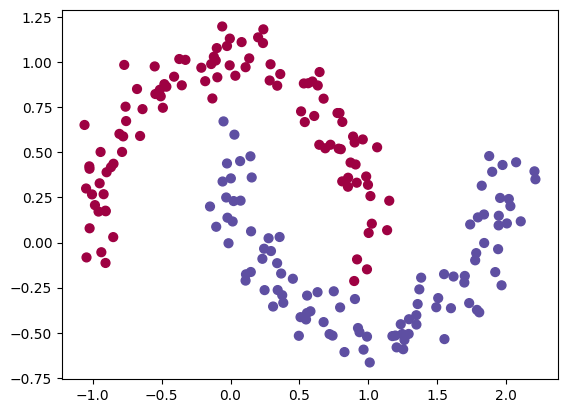

In [5]:
#make a random dataset
np.random.seed(30)
X,Y = sklearn.datasets.make_moons(200, noise=0.1)
plt.scatter(X[:,0], X[:,1], s=40, c=Y, cmap=plt.cm.Spectral) #scatter plot of the data
  


In [6]:
num_exaples = len(X) # training set size
print(num_exaples)

inputdim= 2 # input layer units or dimensionality
hiddenlayer1dim = 3 # hidden layer units or dimensionality
outputdim = 1 # output layer units or dimensionality





200


In [7]:
def sigmoid(x): #defining sigmoid function
    
    x_clipped = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x_clipped))

def sigmoid_derivative(x): #derivative of sigmoid function for backpropagation
    return x * (1 - x)

def error(y, y_pred): #error function using binary cross entropy
 
    # Clip the predicted values to avoid numerical instability
    y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)

    # Compute the binary cross-entropy loss
    loss = - (y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    # Compute the mean loss over all examples
    mean_loss = np.mean(loss)

    return mean_loss

def errorderivative(y, y_pred, epsilon=1e-7):
    # clip y_pred values to avoid divide by zero error
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    # calculate the error derivative
    denominator = (1 - y_pred) * y_pred
    derivative = -(y / y_pred) + ((1 - y) / (1 - y_pred))
    derivative /= denominator
    return derivative

In [160]:
# np.random.seed(0)
# weight1 = np.random.randn(inputdim,hiddenlayer1dim) #initialize weights matrix
# weight2= np.random.randn(hiddenlayer1dim,outputdim) #initialize weights matrix
# biases1 = np.random.randn(hiddenlayer1dim) #initialize biases vector
# biases2 = np.random.randn(outputdim)
# #forward propagation using matrix multiplication for first layer
# z1= np.dot(X,weight1) + biases1
# print("z1")
# print(z1)
# #activation function    
# a1= sigmoid(z1)
# print("a1")
# print(a1)
# z2= np.dot(a1,weight2) + biases2
# print("z2")
# print(z2)
# a2= sigmoid(z2)
# print("a2")
# print(a2.reshape(-1,1))

# #backpropagation
# de_da2 = errorderivative(Y, a2.T)
# print("de/da2")
# print(de_da2)
# da2_dz2 = sigmoid_derivative(a2)
# print("da2/dz2")
# print(da2_dz2)
# dz2_dw2 = a1
# print("dz2/dw2")
# print(dz2_dw2)
# multiply1 = np.multiply(de_da2, da2_dz2.T)
# print("multiply1")
# print(multiply1)
# errorwrtweight2 = np.dot(multiply1, dz2_dw2)


# de_da1 = errorderivative(z2.T, a1.T)
# print("de/da1")
# print(de_da1)
# da1_dz1 = sigmoid_derivative(a1)
# print("da1/dz1")
# print(da1_dz1)
# dz1_dw1 = X
# print("dz1/dw1")
# print(dz1_dw1)
# multiply2 = np.multiply(de_da1, da1_dz1.T)
# print("multiply2")
# print(multiply2)
# errorwrtweight1 = np.dot(multiply2, dz1_dw1)

# errorwrtweight1= errorwrtweight1.reshape(2,3)*0.01
# weight1= weight1-errorwrtweight1
# errorwrtweight2= errorwrtweight2.reshape(3,1)*0.01
# weight2= weight2-errorwrtweight2
# print("errorwrtweight1")
# print(errorwrtweight1)
# print("weight1 new")
# print(weight1)
# print("errorwrtweight2")
# print(errorwrtweight2)
# print("weight2 new")
# print(weight2)


In [8]:
def backprop(X,Y,num_iterations,learning_rate,inputdim,hiddendim,outputdim):
    #generate random weights and biases
    np.random.seed(0)
    weight1 = np.random.randn(inputdim,hiddendim) #initialize weights matrix
    weight2= np.random.randn(hiddendim,outputdim) #initialize weights matrix
    biases1 = np.random.randn(hiddendim) #initialize biases vector
    biases2 = np.random.randn(outputdim) #initialize biases vector
    print("weight1")
    print(weight1)
    print("weight2")
    print(weight2)
    print("biases1")
    print(biases1)
    print("biases2")
    print(biases2)
    
    for i in range(num_iterations): 
        #forward propagation using matrix multiplication for first layer
        z1= np.dot(X,weight1) + biases1
        #activation function    
        a1= sigmoid(z1)
        z2= np.dot(a1,weight2) + biases2
        a2= sigmoid(z2)
        loss = error(Y, a2)

        #backpropagation
        de_da2 = errorderivative(Y, a2.T)
        da2_dz2 = sigmoid_derivative(a2)
        dz2_dw2 = a1   
        multiply1 = np.multiply(de_da2, da2_dz2.T)
        errorwrtweight2 = np.dot(multiply1, dz2_dw2)


        de_da1 = errorderivative(z2.T, a1.T)
        da1_dz1 = sigmoid_derivative(a1)
        dz1_dw1 = X
        multiply2 = np.multiply(de_da1, da1_dz1.T) 
        
        errorwrtweight1 = np.dot(multiply2, dz1_dw1)
        errorwrtweight1= errorwrtweight1.reshape(2,3)*learning_rate
        weight1= weight1-errorwrtweight1
        errorwrtweight2= errorwrtweight2.reshape(3,1)*learning_rate
        weight2= weight2-errorwrtweight2
        



    

        if i%10==0:
            print("loss after iteration %i: %f" %(i, loss))
    
    return weight1,weight2,biases1,biases2         

In [9]:
finalweight1,finalweight2,finalbias1,finalbias2=backprop(X,Y,100,0.001,inputdim,hiddenlayer1dim,outputdim) #call backpropagation function
print("finalweight1")
print(finalweight1)
print("finalweight2")
print(finalweight2)
print("finalbias1")
print(finalbias1)
print("finalbias2")
print(finalbias2)


weight1
[[ 1.76405235  0.40015721  0.97873798]
 [ 2.2408932   1.86755799 -0.97727788]]
weight2
[[ 0.95008842]
 [-0.15135721]
 [-0.10321885]]
biases1
[0.4105985  0.14404357 1.45427351]
biases2
[0.76103773]
loss after iteration 0: 0.901964
loss after iteration 10: 0.802990
loss after iteration 20: 0.880353
loss after iteration 30: 0.935794
loss after iteration 40: 0.976788
loss after iteration 50: 1.008186
loss after iteration 60: 0.964630
loss after iteration 70: 1.030148
loss after iteration 80: 1.072944
loss after iteration 90: 1.087642
finalweight1
[[ 6.57242119e+03 -3.25565111e+03  4.63862869e+04]
 [-1.00899545e+06 -1.25211119e-02 -7.50305443e-01]]
finalweight2
[[ 3.12735093]
 [-2.84857652]
 [-1.03890966]]
finalbias1
[0.4105985  0.14404357 1.45427351]
finalbias2
[0.76103773]
